The simplest example of requesting and plotting AWIPS gridded data with Matplotlib and Cartopy.

In [1]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")
request.setLocationNames("RAP13")
request.setParameters("T")
request.setLevels("2.0FHAG")
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
fcstRun = DataAccessLayer.getForecastRun(cycles[-1], times)
response = DataAccessLayer.getGridData(request, [fcstRun[0]])
grid = response[0]
data = grid.getRawData()
lons, lats = grid.getLatLonCoords()
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]

def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 9),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

### with pcolormesh

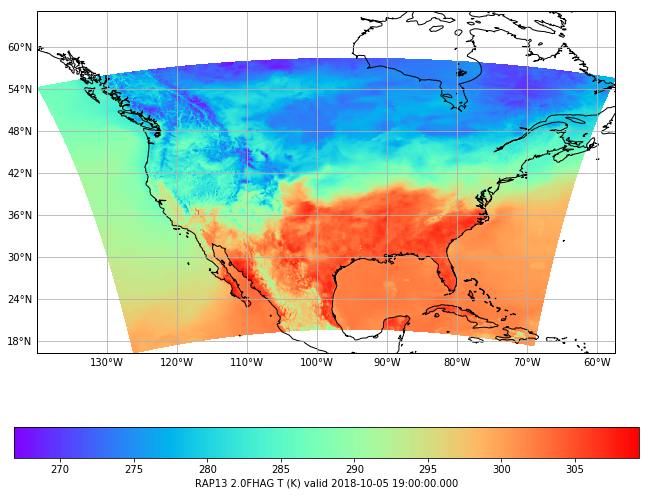

In [2]:
cmap = plt.get_cmap('rainbow')
fig, ax = make_map(bbox=bbox)
cs = ax.pcolormesh(lons, lats, data, cmap=cmap)
cbar = fig.colorbar(cs, shrink=0.7, orientation='horizontal')
cbar.set_label(grid.getLocationName().decode('UTF-8')  +" " \
               + grid.getLevel().decode('UTF-8') + " " \
               + grid.getParameter().decode('UTF-8') \
               + " (" + grid.getUnit().decode('UTF-8') + ") " \
               + "valid " + str(grid.getDataTime().getRefTime()))

### with contourf

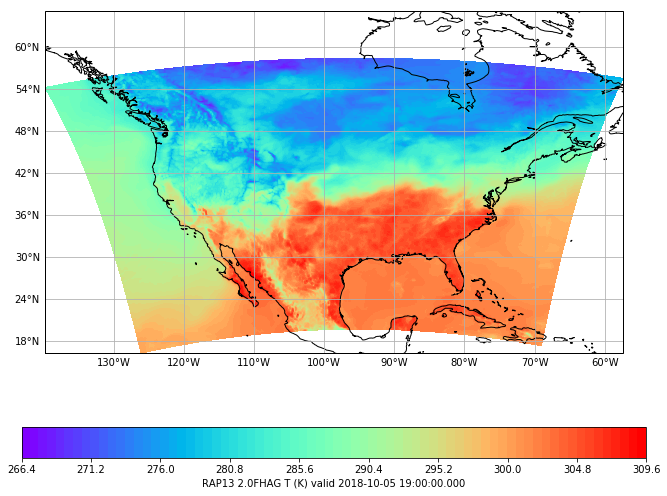

In [3]:
fig2, ax2 = make_map(bbox=bbox)
cs2 = ax2.contourf(lons, lats, data, 80, cmap=cmap,
                  vmin=data.min(), vmax=data.max())
cbar2 = fig2.colorbar(cs2, shrink=0.7, orientation='horizontal')
cbar2.set_label(grid.getLocationName().decode('UTF-8')  +" " \
               + grid.getLevel().decode('UTF-8') + " " \
               + grid.getParameter().decode('UTF-8') \
               + " (" + grid.getUnit().decode('UTF-8') + ") " \
               + "valid " + str(grid.getDataTime().getRefTime()))